# LAB 7

_PART ONE_

In [1]:
import requests
import json
import pandas as pd
import csv
import matplotlib.pyplot as plt 
import numpy as np
lat = "42.089701"
lon = "-75.912537"
genius = requests.get(f'https://api.weather.gov/points/{lat},{lon}')
json_file= genius.json()
json_file
link = json_file["properties"]['forecast']
new_request = requests.get(link)
json = new_request.json()
day = json['properties']['periods']

csv_file = open("Weather.csv", "w", newline="", encoding = "utf-8")
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["Name", "Temperature","Descriptions"])
for i in day:
    name = i["name"]
    temp =i["temperature"]
    tempU = i["temperatureUnit"]
    description = i["detailedForecast"]
    csv_writer.writerow([name, temp, description])
csv_file.close()

<function matplotlib.pyplot.show(close=None, block=None)>

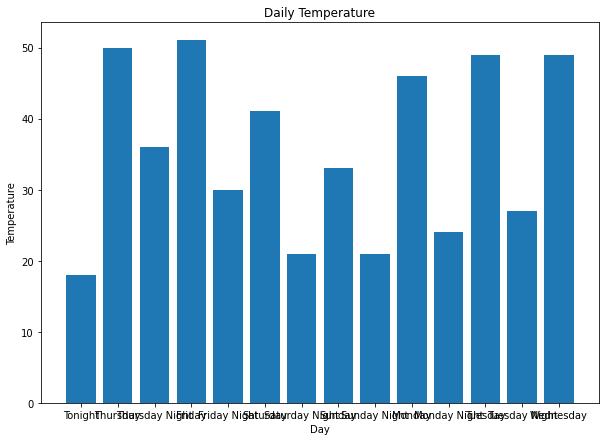

In [2]:
sheet= pd.read_csv("Weather.csv")
sheet
import matplotlib.pyplot as plt 
import numpy as np
df = pd.DataFrame(sheet)
name = df["Name"]
pop = df["Temperature"]
fig = plt.figure(figsize = (10,7))
plt.bar(name,pop) # first ten of the states only
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.title ("Daily Temperature")
plt.show



_PART TWO_

In [3]:
import requests
import json

year = "2023"
countryCode ="US"
link_head = "https://date.nager.at"

# /api/v3/CountryInfo/{countryCode}
# Going into the Country Code part of the Json and Getting the Country Code of the Country using the ISO Code
link =f'{link_head}/api/v3/CountryInfo/{countryCode}' 
json = requests.get(link)
print(json.text )

{"commonName":"United States","officialName":"United States of America","countryCode":"US","region":"Americas","borders":[{"commonName":"Canada","officialName":"Canada","countryCode":"CA","region":"Americas","borders":null},{"commonName":"Mexico","officialName":"United Mexican States","countryCode":"MX","region":"Americas","borders":null}]}


In [4]:
# /api/v3/AvailableCountries
#  giving back the Country code and Country name that they have data for
link =f'{link_head}/api/v3/AvailableCountries' 
json = requests.get(link)
print(json.text )

[{"countryCode":"AD","name":"Andorra"},{"countryCode":"AL","name":"Albania"},{"countryCode":"AR","name":"Argentina"},{"countryCode":"AT","name":"Austria"},{"countryCode":"AU","name":"Australia"},{"countryCode":"AX","name":"Åland Islands"},{"countryCode":"BA","name":"Bosnia and Herzegovina"},{"countryCode":"BB","name":"Barbados"},{"countryCode":"BE","name":"Belgium"},{"countryCode":"BG","name":"Bulgaria"},{"countryCode":"BJ","name":"Benin"},{"countryCode":"BO","name":"Bolivia"},{"countryCode":"BR","name":"Brazil"},{"countryCode":"BS","name":"Bahamas"},{"countryCode":"BW","name":"Botswana"},{"countryCode":"BY","name":"Belarus"},{"countryCode":"BZ","name":"Belize"},{"countryCode":"CA","name":"Canada"},{"countryCode":"CH","name":"Switzerland"},{"countryCode":"CL","name":"Chile"},{"countryCode":"CN","name":"China"},{"countryCode":"CO","name":"Colombia"},{"countryCode":"CR","name":"Costa Rica"},{"countryCode":"CU","name":"Cuba"},{"countryCode":"CY","name":"Cyprus"},{"countryCode":"CZ","name"

In [5]:
# /api/v3/LongWeekend/{year}/{countryCode}
# Holidays in the country of yur choosing that gives you extra days off/long weekend
link =f'{link_head}/api/v3/LongWeekend/{year}/{countryCode}' 
json = requests.get(link)
print(json.text )

[{"startDate":"2022-12-31","endDate":"2023-01-02","dayCount":3,"needBridgeDay":false},{"startDate":"2023-01-14","endDate":"2023-01-16","dayCount":3,"needBridgeDay":false},{"startDate":"2023-02-18","endDate":"2023-02-20","dayCount":3,"needBridgeDay":false},{"startDate":"2023-05-27","endDate":"2023-05-29","dayCount":3,"needBridgeDay":false},{"startDate":"2023-06-17","endDate":"2023-06-19","dayCount":3,"needBridgeDay":false},{"startDate":"2023-07-01","endDate":"2023-07-04","dayCount":4,"needBridgeDay":true},{"startDate":"2023-09-02","endDate":"2023-09-04","dayCount":3,"needBridgeDay":false},{"startDate":"2023-11-10","endDate":"2023-11-12","dayCount":3,"needBridgeDay":false},{"startDate":"2023-11-23","endDate":"2023-11-26","dayCount":4,"needBridgeDay":true},{"startDate":"2023-12-23","endDate":"2023-12-25","dayCount":3,"needBridgeDay":false}]


In [6]:
# /api/v3/PublicHolidays/{year}/{countryCode}
# Gives you a list of all the Holidays and their information
link =f'{link_head}/api/v3/PublicHolidays/{year}/{countryCode}' 
json = requests.get(link)
print(json.text )


[{"date":"2023-01-02","localName":"New Year's Day","name":"New Year's Day","countryCode":"US","fixed":false,"global":true,"counties":null,"launchYear":null,"types":["Public"]},{"date":"2023-01-16","localName":"Martin Luther King, Jr. Day","name":"Martin Luther King, Jr. Day","countryCode":"US","fixed":false,"global":true,"counties":null,"launchYear":null,"types":["Public"]},{"date":"2023-02-20","localName":"Presidents Day","name":"Washington's Birthday","countryCode":"US","fixed":false,"global":true,"counties":null,"launchYear":null,"types":["Public"]},{"date":"2023-04-07","localName":"Good Friday","name":"Good Friday","countryCode":"US","fixed":false,"global":false,"counties":["US-CT","US-DE","US-HI","US-IN","US-KY","US-LA","US-NC","US-ND","US-NJ","US-TN"],"launchYear":null,"types":["Public"]},{"date":"2023-04-07","localName":"Good Friday","name":"Good Friday","countryCode":"US","fixed":false,"global":false,"counties":["US-TX"],"launchYear":null,"types":["Optional"]},{"date":"2023-05-

In [7]:
# /api/v3/IsTodayPublicHoliday/{countryCode}
# Gives back the public holiday today
link =f'{link_head}/api/v3/IsTodayPublicHoliday/{countryCode}' 
json = requests.get(link)
print(json.text )

In [8]:
# /api/v3/NextPublicHolidays/{countryCode}
# List the next public holidays in the Country you choose
link =f'{link_head}/api/v3/NextPublicHolidays/{countryCode}' 
json = requests.get(link) 
print(json.text )

[{"date":"2023-04-07","localName":"Good Friday","name":"Good Friday","countryCode":"US","fixed":false,"global":false,"counties":["US-CT","US-DE","US-HI","US-IN","US-KY","US-LA","US-NC","US-ND","US-NJ","US-TN"],"launchYear":null,"types":["Public"]},{"date":"2023-05-29","localName":"Memorial Day","name":"Memorial Day","countryCode":"US","fixed":false,"global":true,"counties":null,"launchYear":null,"types":["Public"]},{"date":"2023-06-19","localName":"Juneteenth","name":"Juneteenth","countryCode":"US","fixed":false,"global":true,"counties":null,"launchYear":2021,"types":["Public"]},{"date":"2023-07-04","localName":"Independence Day","name":"Independence Day","countryCode":"US","fixed":false,"global":true,"counties":null,"launchYear":null,"types":["Public"]},{"date":"2023-09-04","localName":"Labor Day","name":"Labour Day","countryCode":"US","fixed":false,"global":true,"counties":null,"launchYear":null,"types":["Public"]},{"date":"2023-10-09","localName":"Columbus Day","name":"Columbus Day"

In [9]:
# /api/v3/NextPublicHolidaysWorldwide
# list the public holidays happening world wide next in order
link =f'{link_head}/api/v3/NextPublicHolidaysWorldwide' 
json = requests.get(link)
print(json.text )

[{"date":"2023-03-17","localName":"Saint Patrick's Day","name":"Saint Patrick's Day","countryCode":"CA","fixed":true,"global":false,"counties":["CA-NL"],"launchYear":null,"types":["Public"]},{"date":"2023-03-17","localName":"Saint Patrick's Day","name":"Saint Patrick's Day","countryCode":"GB","fixed":true,"global":false,"counties":["GB-NIR"],"launchYear":null,"types":["Public"]},{"date":"2023-03-17","localName":"Lá Fhéile Pádraig","name":"Saint Patrick's Day","countryCode":"IE","fixed":true,"global":true,"counties":null,"launchYear":1903,"types":["Public"]},{"date":"2023-03-17","localName":"Saint Patrick's Day","name":"Saint Patrick's Day","countryCode":"MS","fixed":true,"global":true,"counties":null,"launchYear":null,"types":["Public"]},{"date":"2023-03-19","localName":"Josefstag","name":"Saint Joseph's Day","countryCode":"CH","fixed":true,"global":false,"counties":["CH-LU","CH-UR","CH-SZ","CH-NW","CH-ZG","CH-GR","CH-TI","CH-VS"],"launchYear":null,"types":["Public"]},{"date":"2023-03-

In [10]:
import requests
import json
import pandas as pd
import csv
import matplotlib.pyplot as plt 
import numpy as np


Year = "2023"
CountryCode = ["US","CA", "CN","FR","DE","VN","GB", "KR","PR","PL"]
total_holiday= []
for i in CountryCode:
    link = f"https://date.nager.at/api/v3/PublicHolidays/{Year}/{i}"
    holidays = requests.get(link)
    h_json = holidays.json()
    if h_json == 0:
        total_holiday.append(0)
    else:
        num = len(h_json)
        total_holiday.append(num)
print (total_holiday)
num_of_holidays = {}
r = 0
for i in CountryCode:
    num_of_holidays[i] = total_holiday[r]
    r += 1
print (num_of_holidays)
    


[13, 30, 7, 11, 19, 4, 16, 15, 21, 13]
{'US': 13, 'CA': 30, 'CN': 7, 'FR': 11, 'DE': 19, 'VN': 4, 'GB': 16, 'KR': 15, 'PR': 21, 'PL': 13}


_BONUS 2_

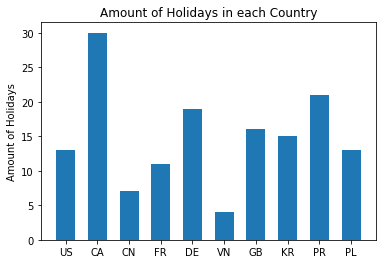

In [11]:
fig, ax = plt.subplots()
ax.bar(CountryCode, total_holiday, width=0.6)
ax.set_ylabel('Amount of Holidays')
ax.set_title('Amount of Holidays in each Country')
plt.show()


_Bonus 1_

<function matplotlib.pyplot.show(close=None, block=None)>

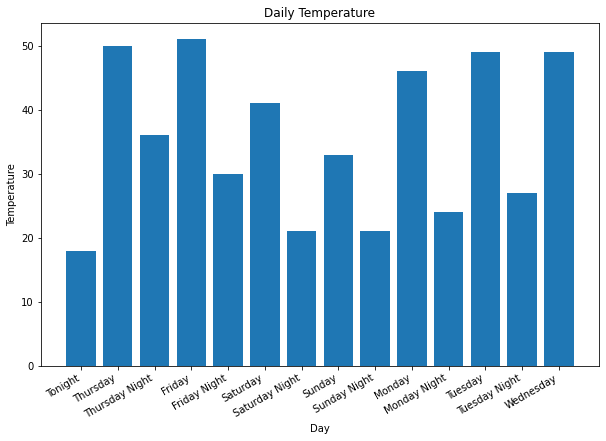

In [12]:
sheet= pd.read_csv("Weather.csv")
sheet
import matplotlib.pyplot as plt 
import numpy as np
df = pd.DataFrame(sheet)
name = df["Name"]
pop = df["Temperature"]
fig = plt.figure(figsize = (10,7))  
plt.bar(name,pop)
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.title ("Daily Temperature")
# from https://stackoverflow.com/questions/26700598/matplotlib-showing-x-tick-labels-overlapping
fig.autofmt_xdate()
plt.show

